## Exercise 1

Example solution provided by Tania Kozynets (AMAS-2021 TA), Feb. 10, 2021; see alternative solutions by [Jason](https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2021/Exercises/Lecture2_CircleArea.py) (course lecturer) and [Jean-Loup](https://www.nbi.dk/~koskinen/Teaching/AdvancedMethodsInAppliedStatistics2021/Exercises/Lecture2_CircleArea_Py3.ipynb) (AMAS-2019 TA).

Here, we will set up the code needed to compute the area of a circle. We will use bits of this code later in Exercise 2 (also in this notebook).

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#import tqdm — see the note about the tqdm module later in the notebook! :)

### My pretty plotting routines

Below are the functions that I use every time when plotting something in Python. These are my secret pathways to pretty plots. Feel free to use or discard completely! They have nothing to do with the circle area calculation.

In [7]:
def reset_plt(ticksize,fontsize):
    plt.style.use('seaborn-v0_8-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)


### Sampling the x,y coordinates

Below, we will create a simple Monte Carlo set of x,y coordinates sampled from uniform distributions. Initially, we will aim to fit the entire square with $x_{\mathrm{max}} = y_{\mathrm{max}} = r$ (the radius). 

In [8]:
#Chosen radius of the circle (can be any positive number)
radius = 5.2
#Number of the samples to fill the whole square with. This is equivalent to "throws".
num_samples = 1000
#Sampling x,y from the uniform distributions
xy_samples = np.random.uniform(low=(0.0,0.0),high=(radius,radius),size=(num_samples,2))
#Splitting the 2D array into the x,y components 
x_samples = xy_samples[:,0]
y_samples = xy_samples[:,1]

### Finding the samples that fall within the quarter circle

These will be our accepted samples for the accept-reject method.

In [9]:
#np.where returns the indices of the samples in our x,y arrays such that they fall within the quarter-circle with the 
#specified radius
accepted_sample_inds = np.where((x_samples**2 + y_samples**2) <= radius**2)[0]
#There are many ways to find the indices of the rejected samples, including the following:
rejected_sample_inds = np.array([i for i in range(num_samples) if i not in accepted_sample_inds])

### Plotting the accepted/rejected samples

Text(0, 0.5, '$y$')

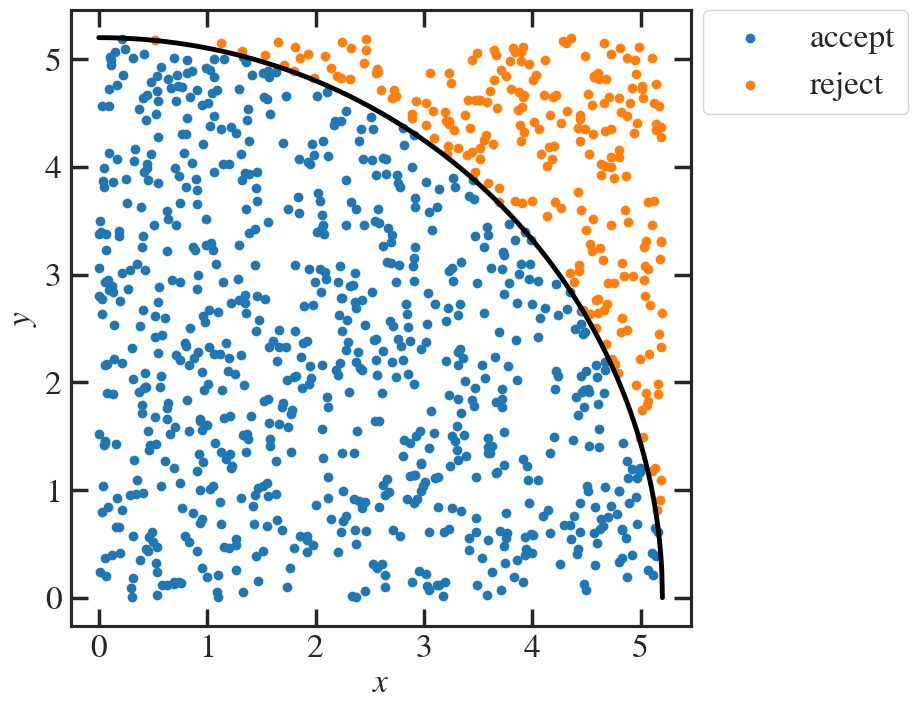

In [10]:
#custom function from my pretty plotting routines to set the font sizes, thicknesses of the ticks, etc
reset_plt(24,24)

#creating the canvas
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)

#plotting the accepted samples
sc_accept = ax.scatter(x_samples[accepted_sample_inds],y_samples[accepted_sample_inds],
                      label = 'accept')
#plotting the rejected samples
sc_reject = ax.scatter(x_samples[rejected_sample_inds],y_samples[rejected_sample_inds],
                      label = 'reject')

#evaluating the points that lie on the x**2 + y**2 = radius**2 curve
x_linspace = np.linspace(0,radius,1000)
y_linspace = np.sqrt(radius**2 - x_linspace**2)

#plotting the boundary of the circle
ax.plot(x_linspace,y_linspace,lw=3.5, color='black',ls='-')

#displaying the legend
ax.legend(loc = (1.02,0.83), frameon = True, framealpha = 0.85)

#custom function from my pretty plotting routines to put the ticks
put_ticks(fig,ax)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')



### How to go about the area calculation?

To get the area from the above simulation, we need to: 

(1) find how many samples were accepted among the total number of samples (i.e. calculate the accepted fraction);

(2) find the area of the square that was used as a boundary for our MC samples;

(3) multiply the fraction from (1) by the area from (2) and get the area of the quarter circle;

(4) multiply the area of the quarter circle by 4 to get the area of the whole circle. 

For example...

In [11]:
fraction_accepted = len(accepted_sample_inds)/num_samples
fraction_accepted

0.766

In [12]:
square_area = radius**2
square_area

27.040000000000003

In [13]:
quarter_circle_area = square_area*fraction_accepted
full_circle_area = 4*quarter_circle_area
full_circle_area

82.85056000000002

## Exercise 2

Great! Above, we got some estimate for the circle area. As we were creating random Monte Carlo samples for the $x$ and $y$ coordinates, this estimate is subject to fluctuations. Let's estimate a bunch of areas, sampling 100 $(x,y)$ points 1000 times.

### Running the 1000 tests to estimate the areas

The function below attempts to estimate the full circle area by knowing the radius of the circle only and applying the accept-reject method.

In [14]:
def calc_area(r,num_samples):
    #We will reuse bits of the previous code — no comments provided as we kind of know by now what it all means ;)
    xy_samples = np.random.uniform(low=(0.0,0.0),high=(r,r),size=(num_samples,2))
    
    x_samples = xy_samples[:,0]
    y_samples = xy_samples[:,1]
    
    accepted_sample_inds = np.where((x_samples**2 + y_samples**2) <= r**2)[0]
    rejected_sample_inds = np.where((x_samples**2 + y_samples**2) > r**2)[0]
    
    fraction_accepted = len(accepted_sample_inds)/num_samples
    full_circle_area = 4*fraction_accepted*r**2
    
    return full_circle_area

In [15]:
num_samples = 100 #I use "samples" and "throws" interchangeably
num_tests = 1000 #similarly, "tests" = "trials" :)

#placeholder for the areas (we will append the estimated values to this array as we go through the loop)
area_estimates = []

for i in range(num_tests):
    
    full_circle_area = calc_area(r=radius,num_samples=num_samples)
    area_estimates = np.append(area_estimates, full_circle_area)

### Plotting the histogram of area frequencies

We will now histogram our estimated areas and see where the gaps, if any, appear for the different bin sizes.

<>:12: SyntaxWarning: invalid escape sequence '\,'
<>:12: SyntaxWarning: invalid escape sequence '\,'
/var/folders/t0/dsmc290j5355qf2rn298qwb40000gn/T/ipykernel_90940/3299089970.py:12: SyntaxWarning: invalid escape sequence '\,'
  label = 'bin width = $%s\,\mathrm{m}^2$'%bin_size)


Text(0.5, 1.0, 'circle area histogram\n')

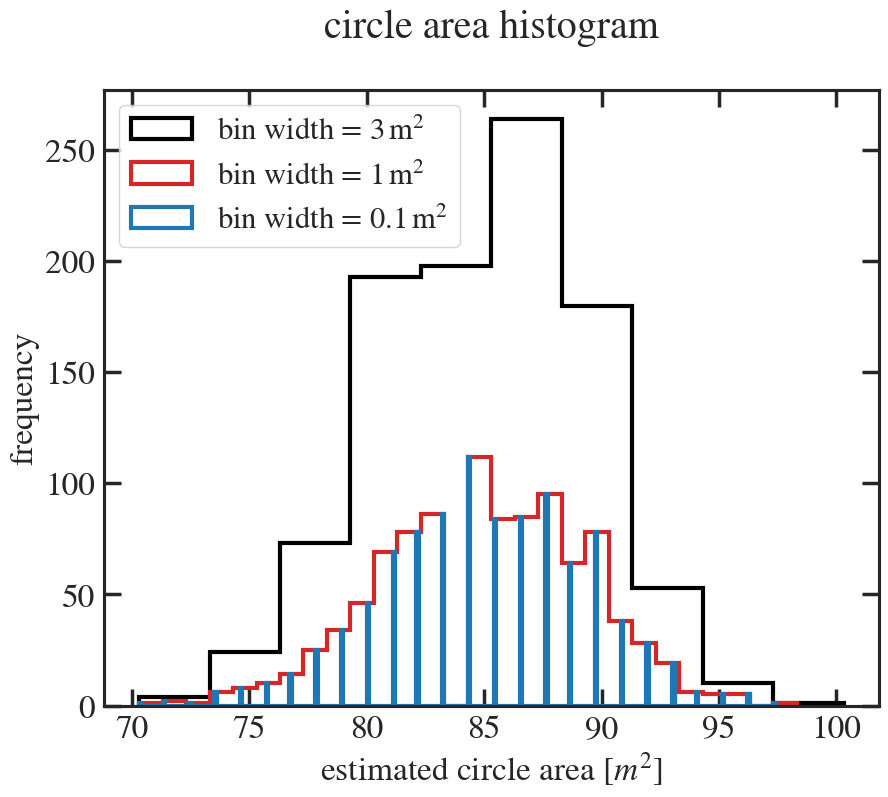

In [16]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

#these are the bin sizes that we want to use in our histograms
bin_sizes = [3,1,0.1] #m^2
colors = ['black','C3','C0']

for ib,bin_size in enumerate(bin_sizes):

    ax.hist(area_estimates,bins=np.arange(np.min(area_estimates),np.max(area_estimates)+bin_size,bin_size),
           facecolor = 'none', histtype = 'step', lw = 3.0, color = colors[ib],
           label = 'bin width = $%s\,\mathrm{m}^2$'%bin_size)
    
put_ticks(fig,ax)

ax.legend(loc = 'upper left',frameon = True, fontsize = 22)
ax.set_xlabel(r'estimated circle area [$m^2$]')
ax.set_ylabel('frequency')
ax.set_title('circle area histogram'+'\n')

## Exercise 3

Now let's see if we can put the above area estimates to use and find the approximate value of $\pi$. We all secretly know that the area of the circle should be $\pi r^2$. So, to get the estimate of $\pi$, we should divide our area estimates by $r^2$.

We will need to do this for 100000 throws maximum, so let's do this in one go and then cut off the estimates at the smaller values when needed.

In [17]:
num_throws_to_test = [10,100,1000,10000,100000]

pi_estimates = []

for num_throws in num_throws_to_test: 
    
    full_circle_area = calc_area(r=radius,num_samples = num_throws)
    this_pi_estimate = full_circle_area/radius**2
    pi_estimates = np.append(pi_estimates, this_pi_estimate) 

### Plotting the estimated pi values for several tested throw numbers

Text(0, 0.5, '$\\pi$ estimate')

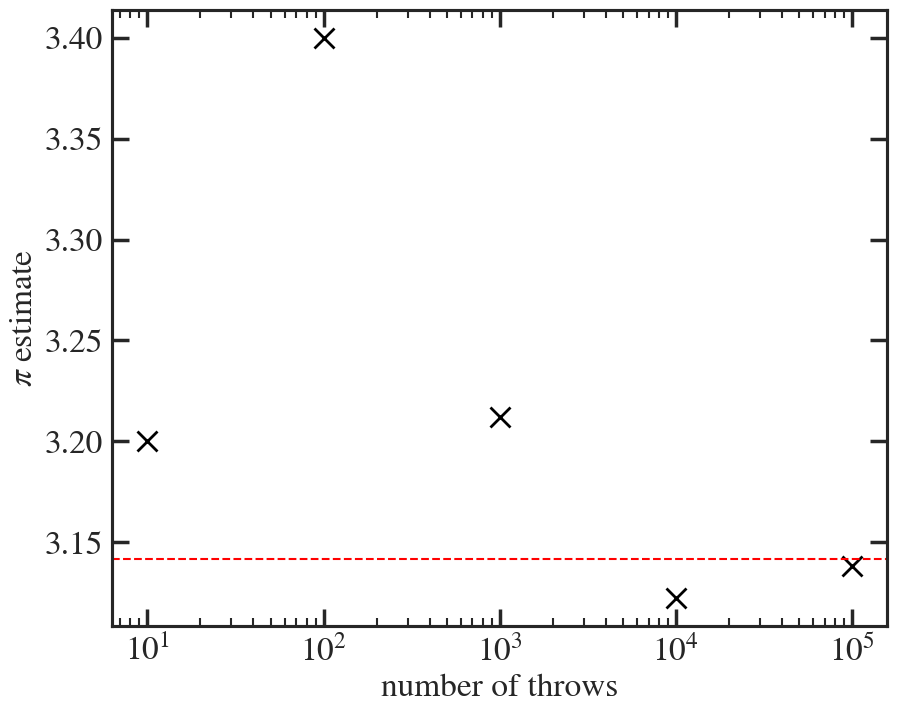

In [18]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

#displaying the results for 10,100,1000,10000,100000 throws
ax.plot(num_throws_to_test,pi_estimates,ls='none',marker = 'x', markersize = 15, color = 'black', mew = 2)
#the true value of pi
ax.axhline(y=np.pi, color = 'red', ls = '--')

put_ticks(fig,ax)
ax.set_xscale('log')

ax.set_xlabel('number of throws')
ax.set_ylabel(r'$\pi$ estimate')

### More tests!

Now, we will perform 200 more tests for num_throws varied between 1-10000.

In [19]:
num_throws_to_test = np.random.choice(range(10000),200,replace = False)

pi_estimates = []

#A fun note: install tqdm module and run for num_throws in tqdm.tqdm(...) if you want to see the progress bar
#for your for loop! Remember to import tqdm though.
for num_throws in num_throws_to_test: 
    
    full_circle_area = calc_area(r=radius,num_samples = num_throws)
    this_pi_estimate = full_circle_area/radius**2
    pi_estimates = np.append(pi_estimates, this_pi_estimate)

<>:7: SyntaxWarning: invalid escape sequence '\p'
<>:7: SyntaxWarning: invalid escape sequence '\p'
/var/folders/t0/dsmc290j5355qf2rn298qwb40000gn/T/ipykernel_90940/1550678317.py:7: SyntaxWarning: invalid escape sequence '\p'
  ax.axhline(y=np.pi, color = 'red', ls = '--', lw = 3.5, label = 'true value of $\pi$')


Text(0, 0.5, '$\\pi$ estimate')

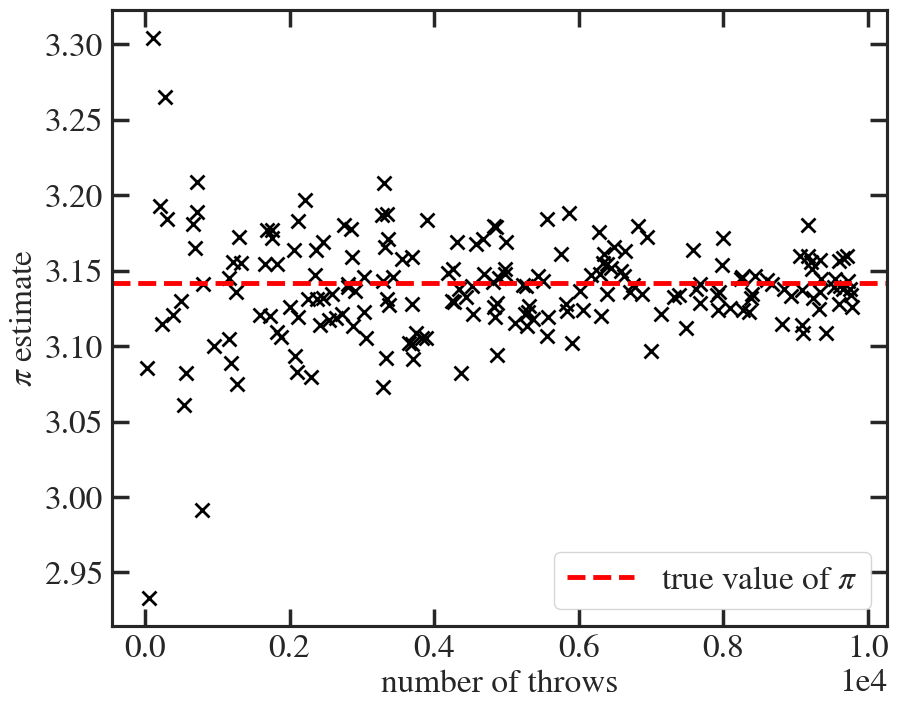

In [20]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

#displaying the results for 10,100,1000,10000,100000 throws
ax.plot(num_throws_to_test,pi_estimates,ls='none',marker = 'x', markersize = 10, color = 'black', mew = 2)
#the true value of pi
ax.axhline(y=np.pi, color = 'red', ls = '--', lw = 3.5, label = 'true value of $\pi$')

put_ticks(fig,ax)
ax.legend(loc = 'lower right',frameon = True)

ax.set_xlabel('number of throws')
ax.set_ylabel(r'$\pi$ estimate')

## Final notes: the Central Limit Theorem


Now, we will attempt to estimate the value of $\pi$ from 10,000 trials and using 1000 throws per trial, histogram the resulting distribution, and see how well that compares to a gaussian. We will just plot the histogram and overlay the gaussian on top, while the ambitious can perform the actual fit, evaluate the $\chi^2$, etc. :) 

In [21]:
pi_for_clt = []
num_tests = 10000
num_samples = 1000

#collecting the values of pi in just the same way as before! 
for i in range(num_tests): 
    full_circle_area = calc_area(r=radius,num_samples = num_samples)
    this_pi_estimate = full_circle_area/radius**2
    pi_for_clt = np.append(pi_for_clt, this_pi_estimate)
    

<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
<>:6: SyntaxWarning: invalid escape sequence '\p'
<>:18: SyntaxWarning: invalid escape sequence '\p'
/var/folders/t0/dsmc290j5355qf2rn298qwb40000gn/T/ipykernel_90940/839976431.py:6: SyntaxWarning: invalid escape sequence '\p'
  label = 'estimated $\pi$ values')
/var/folders/t0/dsmc290j5355qf2rn298qwb40000gn/T/ipykernel_90940/839976431.py:18: SyntaxWarning: invalid escape sequence '\p'
  ax.set_xlabel('$\pi$ estimates')


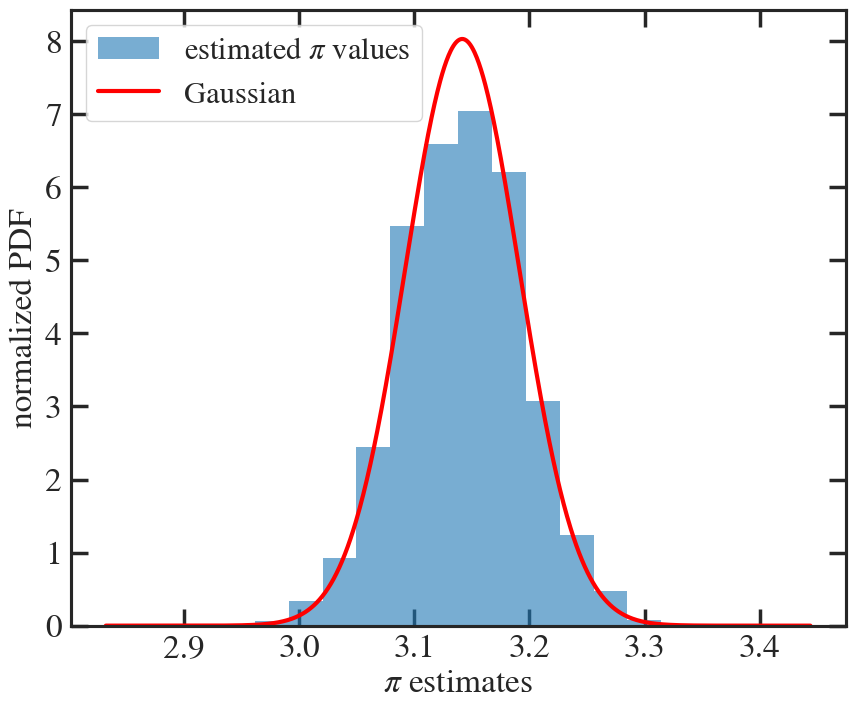

In [22]:
fig = plt.figure(figsize = (10,8))
ax = fig.add_subplot(111)

#histogramming the obtained pi values. notice the flag density = True; it means we're plotting the normalized PDF
ax.hist(pi_for_clt,bins = np.linspace(np.min(pi_for_clt),np.max(pi_for_clt),15),density = True, alpha = 0.6,
       label = 'estimated $\pi$ values')

#creating the finely spaced domain for the evaluation of the gaussian
pi_linspace = np.linspace(np.min(pi_for_clt)-0.1,np.max(pi_for_clt)+0.1,1000)

#the gaussian distribution centered at true pi and normalized to 1
sigma = np.pi/(2*np.sqrt(num_samples))
normalized_gaussian = (1/np.sqrt(2*np.pi*sigma**2))*np.exp(-(pi_linspace-np.pi)**2/(2*sigma**2))

ax.plot(pi_linspace,normalized_gaussian, lw = 3.0, color = 'red', label = 'Gaussian')

put_ticks(fig,ax)
ax.set_xlabel('$\pi$ estimates')
ax.set_ylabel('normalized PDF')

ax.legend(loc = 'upper left',frameon=True,fontsize = 22)